In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
!pip install kaggle
!mkdir ~/.kaggle
!cp /content/kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [6]:
# !kaggle competitions download -c diabetes-classification
# !kaggle kernels output mohitkarelia/medical-cost-estimation -p /path/to/dest

Kernel log downloaded to /path/to/dest/medical-cost-estimation.log 


In [7]:
# !unzip /content/diabetes.zip

unzip:  cannot find or open /content/diabetes.zip, /content/diabetes.zip.zip or /content/diabetes.zip.ZIP.


In [8]:
df=pd.read_csv('../content/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [9]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [10]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [11]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [12]:
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [13]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [14]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

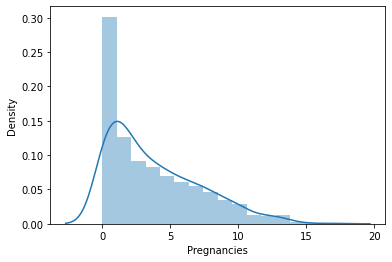

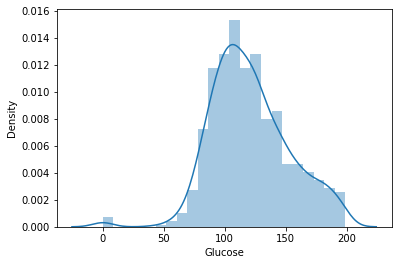

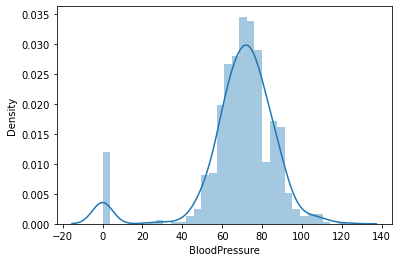

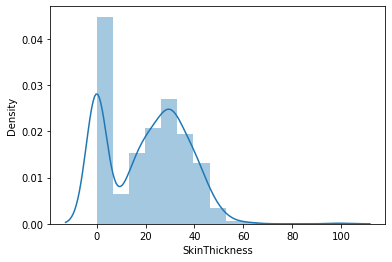

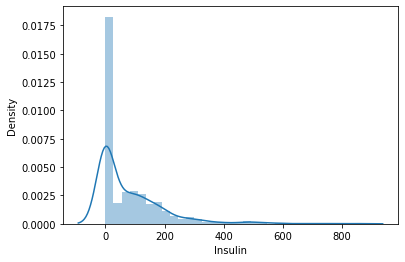

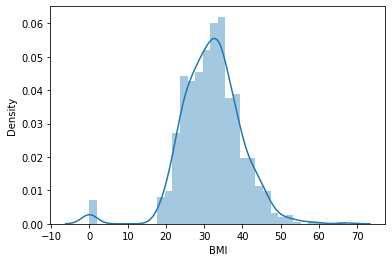

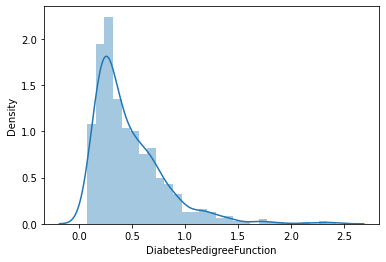

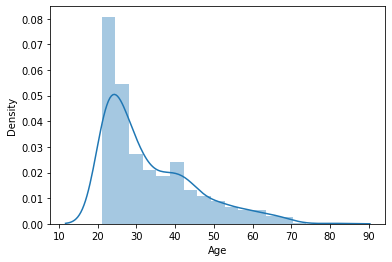

In [15]:
for column in X.columns:
    plt.figure()
    sns.distplot(df[column])

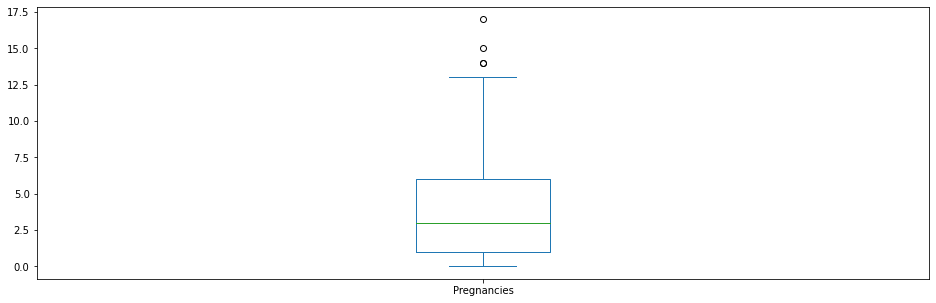

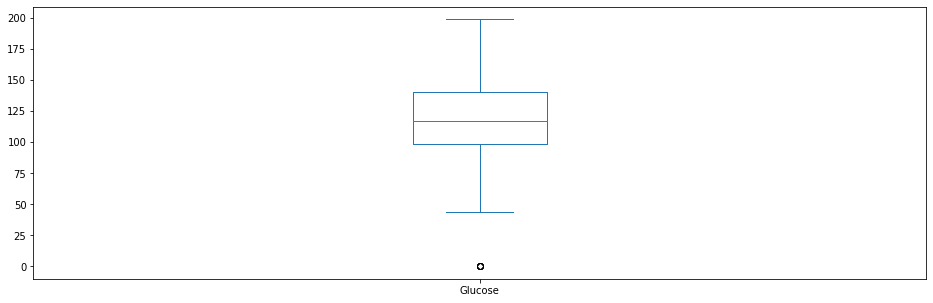

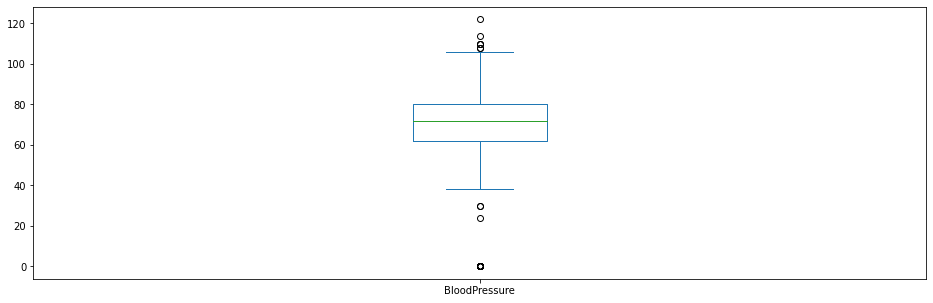

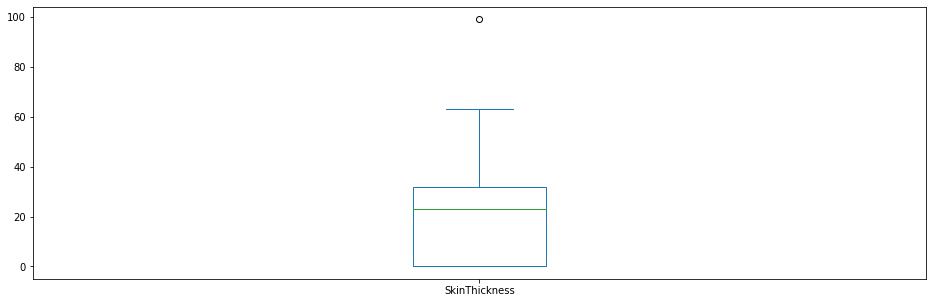

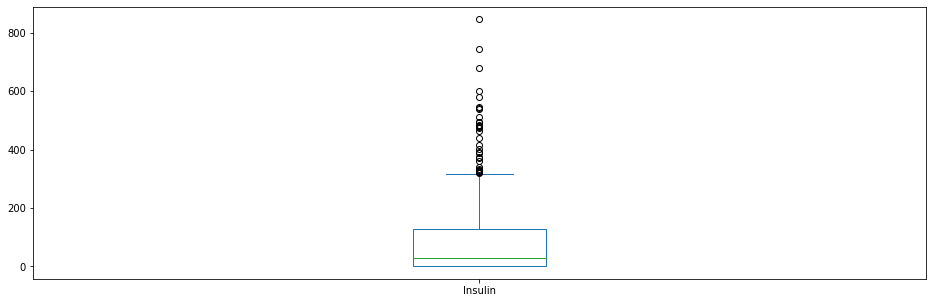

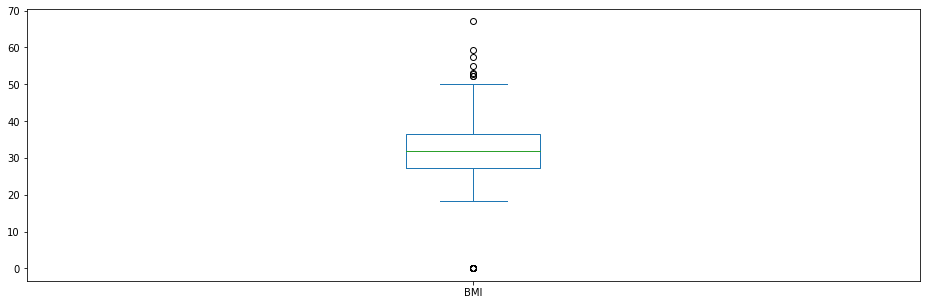

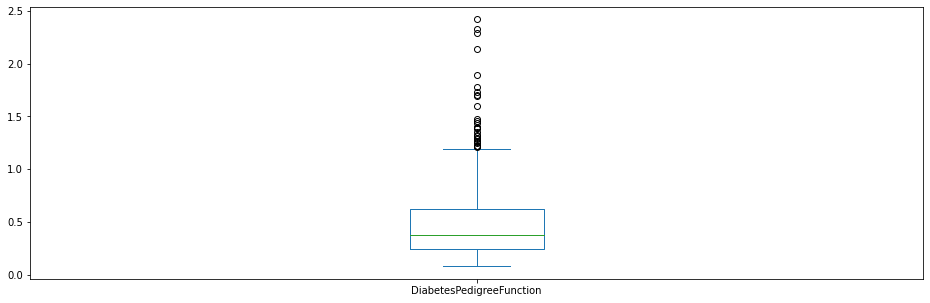

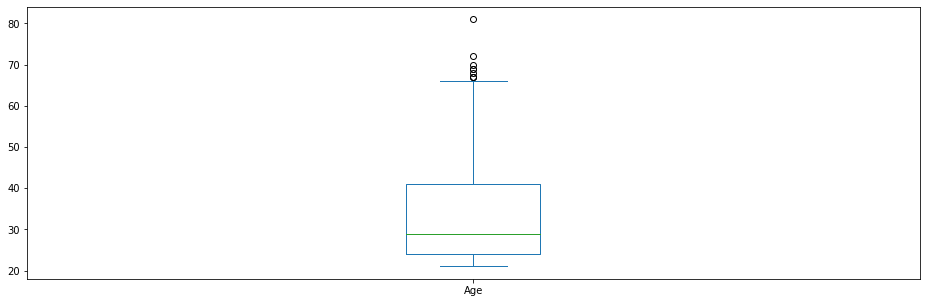

In [16]:
for column in X.columns:
    plt.figure()
    df[column].plot.box(figsize=(16,5))

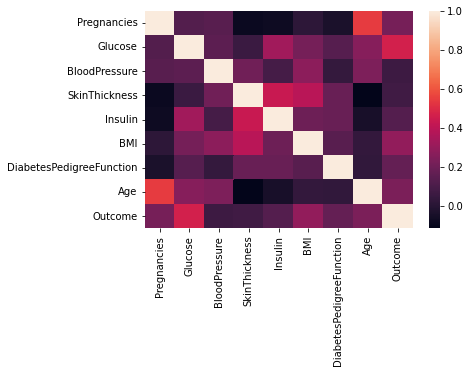

In [17]:
sns.heatmap(df.corr())

In [18]:
from xgboost import XGBClassifier
model=XGBClassifier(gamma=0)
model.fit(X_train,y_train)

XGBClassifier()

In [19]:
xg_pred=model.predict(X_test)

In [20]:
from sklearn import metrics 
print("Accuracy=",format(metrics.accuracy_score(y_test,xg_pred)))

Accuracy= 0.7748917748917749


In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Activation

In [24]:
model1 = Sequential()
model1.add(Dense(32,input_shape=(X_train.shape[1],)))
model1.add(Activation('relu'))
model1.add(Dense(64,input_shape=(X_train.shape[1],)))
model1.add(Activation('relu'))
model1.add(Dense(64,input_shape=(X_train.shape[1],)))
model1.add(Activation('relu'))
model1.add(Dense(128,input_shape=(X_train.shape[1],)))
model1.add(Activation('relu'))
model1.add(Dense(128,input_shape=(X_train.shape[1],)))
model1.add(Activation('relu'))
model1.add(Dense(256,input_shape=(X_train.shape[1],)))
model1.add(Activation('relu'))
model1.add(Dense(256,input_shape=(X_train.shape[1],)))
model1.add(Activation('relu'))
model1.add(Dense(2))
model1.add(Activation('softmax'))


In [26]:
model1.compile(loss='sparse_categorical_crossentropy',
              optimizer="adam",metrics=['accuracy'])
history=model1.fit(X_train, y_train, batch_size=128, epochs=100, verbose=1, validation_data=(X_test, y_test))
loss, accuracy = model1.evaluate(X_test,y_test, verbose=0)

Epoch 1/100
5/5 [==============================] - 2s 65ms/step - loss: 2.3468 - accuracy: 0.5661 - val_loss: 1.5557 - val_accuracy: 0.3203
Epoch 2/100
5/5 [==============================] - 0s 12ms/step - loss: 1.1033 - accuracy: 0.4600 - val_loss: 0.7894 - val_accuracy: 0.6797
Epoch 3/100
5/5 [==============================] - 0s 16ms/step - loss: 0.7418 - accuracy: 0.6294 - val_loss: 0.6897 - val_accuracy: 0.6580
Epoch 4/100
5/5 [==============================] - 0s 14ms/step - loss: 0.6426 - accuracy: 0.6480 - val_loss: 0.6484 - val_accuracy: 0.6970
Epoch 5/100
5/5 [==============================] - 0s 13ms/step - loss: 0.6296 - accuracy: 0.7002 - val_loss: 0.6293 - val_accuracy: 0.7056
Epoch 6/100
5/5 [==============================] - 0s 13ms/step - loss: 0.5950 - accuracy: 0.7002 - val_loss: 0.6231 - val_accuracy: 0.6797
Epoch 7/100
5/5 [==============================] - 0s 13ms/step - loss: 0.5839 - accuracy: 0.7207 - val_loss: 0.6575 - val_accuracy: 0.6364
Epoch 8/100
5/5 [===

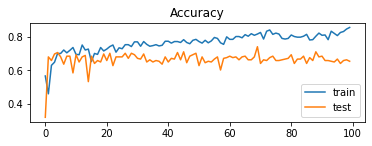

In [27]:
plt.subplot(212)
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show()